In [73]:
!python --version

Python 3.10.12


# On-Balance Volume (OBV)

[https://www.investopedia.com/articles/active-trading/041814/four-most-commonlyused-indicators-trend-trading.asp](https://www.investopedia.com/articles/active-trading/041814/four-most-commonlyused-indicators-trend-trading.asp)

Volume itself is a valuable indicator, and on-balance volume (OBV) takes a significant amount of volume information and compiles it into a single one-line indicator. The indicator measures cumulative buying and selling pressure by adding the volume on "up" days and subtracting volume on "down" days.

Ideally, the volume should confirm trends. A rising price should be accompanied by a rising OBV; a falling price should be accompanied by a falling OBV.

If OBV is rising and the price isn't, it's likely that the price will follow the OBV in the future and start rising. If the price is rising and OBV is flat-lining or falling, the price may be near a top. If the price is falling and OBV is flat-lining or rising, the price could be nearing a bottom.

# pip

In [ ]:
!pip install -U git+https://github.com/iqoptionapi/iqoptionapi.git

In [ ]:
!pip install python_dotenv

# Importando bibliotecas

In [76]:
import logging

In [77]:
from os import getenv

In [78]:
from dotenv import load_dotenv

In [79]:
from iqoptionapi.stable_api import IQ_Option

In [80]:
from time import time

In [81]:
import pandas as pd

In [82]:
import numpy as np

In [83]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Configurações iniciais

In [84]:
load_dotenv()

True

In [85]:
iqoption_email = getenv('my_email')

In [86]:
iqoption_password = getenv('my_password')

In [87]:
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s %(message)s')
Iq = IQ_Option(iqoption_email, iqoption_password)

In [88]:
check, reason = Iq.connect()
check, reason

(True, None)

In [89]:
goal = 'EURUSD'

# Carregando informações de velas

In [90]:
velas = Iq.get_candles(goal, 60, 111, time())

In [91]:
df = pd.DataFrame(velas)

In [92]:
df

,id,from,at,to,open,close,min,max,volume
0,2380987,1710393960,1710394020000000000,1710394020,1.094165,1.094070,1.094050,1.094170,135
1,2380988,1710394020,1710394080001919091,1710394080,1.094060,1.094090,1.094060,1.094110,134
2,2380989,1710394080,1710394140000000000,1710394140,1.094090,1.094130,1.094075,1.094130,133
3,2380990,1710394140,1710394200000000000,1710394200,1.094140,1.094140,1.094115,1.094165,173
4,2380991,1710394200,1710394260000000000,1710394260,1.094140,1.094100,1.094085,1.094150,141
...,...,...,...,...,...,...,...,...,...
106,2381093,1710400320,1710400380000000000,1710400380,1.093950,1.093990,1.093950,1.094045,133
107,2381094,1710400380,1710400440000000000,1710400440,1.093990,1.093985,1.093940,1.094010,173
108,2381095,1710400440,1710400500000000000,1710400500,1.093990,1.094035,1.093990,1.094075,161
109,2381096,1710400500,1710400560000000000,1710400560,1.094040,1.093980,1.093975,1.094050,161


# A coluna 'at' contém registros de data e hora no formato de hora Unix, convertendo para datetime

[https://www.unixtimestamp.com/](https://www.unixtimestamp.com/)

In [93]:
df['at'] = pd.to_datetime(df['at'], unit='ns')
df

,id,from,at,to,open,close,min,max,volume
0,2380987,1710393960,2024-03-14 05:27:00.000000000,1710394020,1.094165,1.094070,1.094050,1.094170,135
1,2380988,1710394020,2024-03-14 05:28:00.001919091,1710394080,1.094060,1.094090,1.094060,1.094110,134
2,2380989,1710394080,2024-03-14 05:29:00.000000000,1710394140,1.094090,1.094130,1.094075,1.094130,133
3,2380990,1710394140,2024-03-14 05:30:00.000000000,1710394200,1.094140,1.094140,1.094115,1.094165,173
4,2380991,1710394200,2024-03-14 05:31:00.000000000,1710394260,1.094140,1.094100,1.094085,1.094150,141
...,...,...,...,...,...,...,...,...,...
106,2381093,1710400320,2024-03-14 07:13:00.000000000,1710400380,1.093950,1.093990,1.093950,1.094045,133
107,2381094,1710400380,2024-03-14 07:14:00.000000000,1710400440,1.093990,1.093985,1.093940,1.094010,173
108,2381095,1710400440,2024-03-14 07:15:00.000000000,1710400500,1.093990,1.094035,1.093990,1.094075,161
109,2381096,1710400500,2024-03-14 07:16:00.000000000,1710400560,1.094040,1.093980,1.093975,1.094050,161


# Transformando a coluna 'at' no index

In [94]:
df = df.set_index(pd.DatetimeIndex(df['at'].values))
df

,id,from,at,to,open,close,min,max,volume
2024-03-14 05:27:00.000000000,2380987,1710393960,2024-03-14 05:27:00.000000000,1710394020,1.094165,1.094070,1.094050,1.094170,135
2024-03-14 05:28:00.001919091,2380988,1710394020,2024-03-14 05:28:00.001919091,1710394080,1.094060,1.094090,1.094060,1.094110,134
2024-03-14 05:29:00.000000000,2380989,1710394080,2024-03-14 05:29:00.000000000,1710394140,1.094090,1.094130,1.094075,1.094130,133
2024-03-14 05:30:00.000000000,2380990,1710394140,2024-03-14 05:30:00.000000000,1710394200,1.094140,1.094140,1.094115,1.094165,173
2024-03-14 05:31:00.000000000,2380991,1710394200,2024-03-14 05:31:00.000000000,1710394260,1.094140,1.094100,1.094085,1.094150,141
...,...,...,...,...,...,...,...,...,...
2024-03-14 07:13:00.000000000,2381093,1710400320,2024-03-14 07:13:00.000000000,1710400380,1.093950,1.093990,1.093950,1.094045,133
2024-03-14 07:14:00.000000000,2381094,1710400380,2024-03-14 07:14:00.000000000,1710400440,1.093990,1.093985,1.093940,1.094010,173
2024-03-14 07:15:00.000000000,2381095,1710400440,2024-03-14 07:15:00.000000000,1710400500,1.093990,1.094035,1.093990,1.094075,161
2024-03-14 07:16:00.000000000,2381096,1710400500,2024-03-14 07:16:00.000000000,1710400560,1.094040,1.093980,1.093975,1.094050,161


# Visualizando os preços

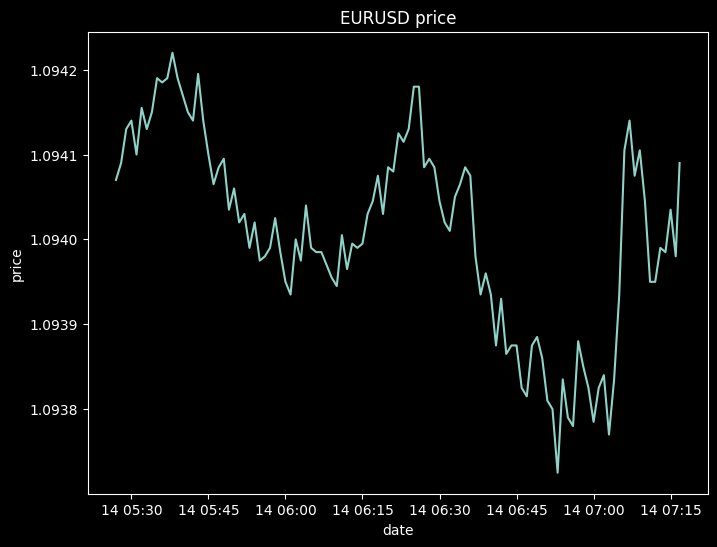

In [95]:
plt.figure(figsize=(8, 6))
plt.plot(df.close, label='close')
plt.title(f'{goal} price')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

# Calculando On-Balance Volume (OBV) - Método 1

In [96]:
df.volume

2024-03-14 05:27:00.000000000    135
2024-03-14 05:28:00.001919091    134
2024-03-14 05:29:00.000000000    133
2024-03-14 05:30:00.000000000    173
2024-03-14 05:31:00.000000000    141
                                ... 
2024-03-14 07:13:00.000000000    133
2024-03-14 07:14:00.000000000    173
2024-03-14 07:15:00.000000000    161
2024-03-14 07:16:00.000000000    161
2024-03-14 07:16:45.000000000    127
Name: volume, Length: 111, dtype: int64

In [97]:
df.close

2024-03-14 05:27:00.000000000    1.094070
2024-03-14 05:28:00.001919091    1.094090
2024-03-14 05:29:00.000000000    1.094130
2024-03-14 05:30:00.000000000    1.094140
2024-03-14 05:31:00.000000000    1.094100
                                   ...   
2024-03-14 07:13:00.000000000    1.093990
2024-03-14 07:14:00.000000000    1.093985
2024-03-14 07:15:00.000000000    1.094035
2024-03-14 07:16:00.000000000    1.093980
2024-03-14 07:16:45.000000000    1.094090
Name: close, Length: 111, dtype: float64

In [98]:
OBV_close = list()
OBV_close.append(0)

# Loop na coluna 'close' do df do segundo registro (index 1) até o final
for i in range(1, len(df.close)):
  if df.close[i] > df.close[i - 1]:
    OBV_close.append(OBV_close[-1] + df.volume[i])
  elif df.close[i] < df.close[i - 1]:
    OBV_close.append(OBV_close[-1] - df.volume[i])
  else:
    OBV_close.append(OBV_close[-1])

# Guardando o OBV (criado na célula anterior) e o OBV Moving Average - OBV EMA - em colunas no df

In [99]:
df['OBV'] = OBV_close

# Cálculo do EMA para o OBV
df['OBV_EMA'] = df['OBV'].ewm(span=20).mean()

df

,id,from,at,to,open,close,min,max,volume,OBV,OBV_EMA
2024-03-14 05:27:00.000000000,2380987,1710393960,2024-03-14 05:27:00.000000000,1710394020,1.094165,1.094070,1.094050,1.094170,135,0,0.000000
2024-03-14 05:28:00.001919091,2380988,1710394020,2024-03-14 05:28:00.001919091,1710394080,1.094060,1.094090,1.094060,1.094110,134,134,70.350000
2024-03-14 05:29:00.000000000,2380989,1710394080,2024-03-14 05:29:00.000000000,1710394140,1.094090,1.094130,1.094075,1.094130,133,267,142.558701
2024-03-14 05:30:00.000000000,2380990,1710394140,2024-03-14 05:30:00.000000000,1710394200,1.094140,1.094140,1.094115,1.094165,173,440,228.425405
2024-03-14 05:31:00.000000000,2380991,1710394200,2024-03-14 05:31:00.000000000,1710394260,1.094140,1.094100,1.094085,1.094150,141,299,245.496799
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-14 07:13:00.000000000,2381093,1710400320,2024-03-14 07:13:00.000000000,1710400380,1.093950,1.093990,1.093950,1.094045,133,-423,-499.103979
2024-03-14 07:14:00.000000000,2381094,1710400380,2024-03-14 07:14:00.000000000,1710400440,1.093990,1.093985,1.093940,1.094010,173,-596,-508.332358
2024-03-14 07:15:00.000000000,2381095,1710400440,2024-03-14 07:15:00.000000000,1710400500,1.093990,1.094035,1.093990,1.094075,161,-435,-501.348196
2024-03-14 07:16:00.000000000,2381096,1710400500,2024-03-14 07:16:00.000000000,1710400560,1.094040,1.093980,1.093975,1.094050,161,-596,-510.362803


# Visualizando o OBV e o OBV EMA

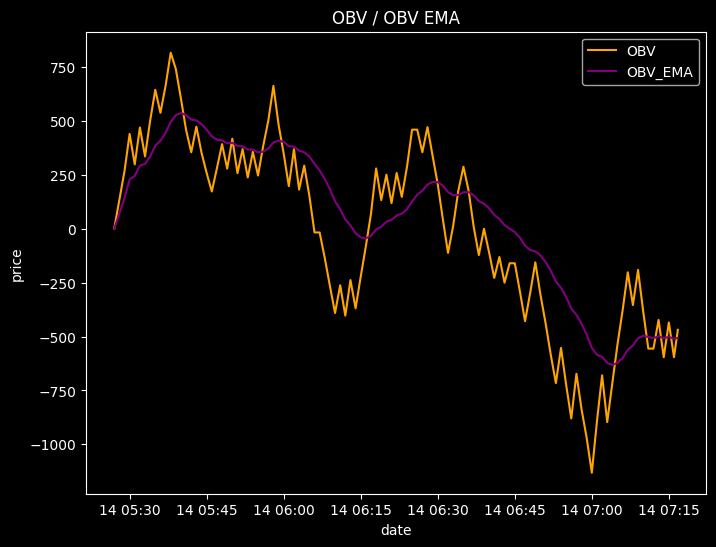

In [100]:
plt.figure(figsize=(8, 6))
plt.plot(df.OBV, label='OBV', color='orange')
plt.plot(df.OBV_EMA, label='OBV_EMA', color='purple')
plt.title('OBV / OBV EMA')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()

A estratégia consiste em comprar o ativo sempre quando o OBV ultrapassa o OBV EMA

On a similar note, vender o ativo quando o OBV EMA ultrapassa o OBV

# Criando uma função para sinalizar quando comprar e quando vender

If OBV > OBV_EMA then Buy

If OBV < OBV_EMA then Sell

Else Hold 🫸🚨

In [101]:
def comprar_vender_segurar(df, coluna_1, coluna_2):
  sinalizador_comprar = list()
  sinalizador_vender = list()
  sinalizador = -1

  # Loop sobre o tamanho do df
  for i in range (0, len(df)):

    # If OBV > OBV_EMA then Buy (coluna_1 é o OBV, coluna_2 é o OBV_EMA)
    if df[coluna_1][i] > df[coluna_2][i] and sinalizador != 1:
      sinalizador_comprar.append(df['close'][i])
      sinalizador_vender.append(np.nan)
      sinalizador = 1

    # If OBV < OBV_EMA then Sell
    elif df[coluna_1][i] < df[coluna_2][i] and sinalizador != 0:
      sinalizador_vender.append(df['close'][i])
      sinalizador_comprar.append(np.nan)
      sinalizador = 0

    # Else Hold 🫸🚨
    else:
      sinalizador_comprar.append(np.nan)
      sinalizador_vender.append(np.nan)

  return (sinalizador_comprar, sinalizador_vender)

# Criando colunas buy e sell no dataframe

In [102]:
x = comprar_vender_segurar(df, 'OBV', 'OBV_EMA')

df['sinalizador_comprar'] = x[0]
df['sinalizador_vender'] = x[1]

df

,id,from,at,to,open,close,min,max,volume,OBV,OBV_EMA,sinalizador_comprar,sinalizador_vender
2024-03-14 05:27:00.000000000,2380987,1710393960,2024-03-14 05:27:00.000000000,1710394020,1.094165,1.094070,1.094050,1.094170,135,0,0.000000,NaN,NaN
2024-03-14 05:28:00.001919091,2380988,1710394020,2024-03-14 05:28:00.001919091,1710394080,1.094060,1.094090,1.094060,1.094110,134,134,70.350000,1.094090,NaN
2024-03-14 05:29:00.000000000,2380989,1710394080,2024-03-14 05:29:00.000000000,1710394140,1.094090,1.094130,1.094075,1.094130,133,267,142.558701,NaN,NaN
2024-03-14 05:30:00.000000000,2380990,1710394140,2024-03-14 05:30:00.000000000,1710394200,1.094140,1.094140,1.094115,1.094165,173,440,228.425405,NaN,NaN
2024-03-14 05:31:00.000000000,2380991,1710394200,2024-03-14 05:31:00.000000000,1710394260,1.094140,1.094100,1.094085,1.094150,141,299,245.496799,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-14 07:13:00.000000000,2381093,1710400320,2024-03-14 07:13:00.000000000,1710400380,1.093950,1.093990,1.093950,1.094045,133,-423,-499.103979,1.093990,NaN
2024-03-14 07:14:00.000000000,2381094,1710400380,2024-03-14 07:14:00.000000000,1710400440,1.093990,1.093985,1.093940,1.094010,173,-596,-508.332358,NaN,1.093985
2024-03-14 07:15:00.000000000,2381095,1710400440,2024-03-14 07:15:00.000000000,1710400500,1.093990,1.094035,1.093990,1.094075,161,-435,-501.348196,1.094035,NaN
2024-03-14 07:16:00.000000000,2381096,1710400500,2024-03-14 07:16:00.000000000,1710400560,1.094040,1.093980,1.093975,1.094050,161,-596,-510.362803,NaN,1.093980


# Plotar os preços de compra e venda

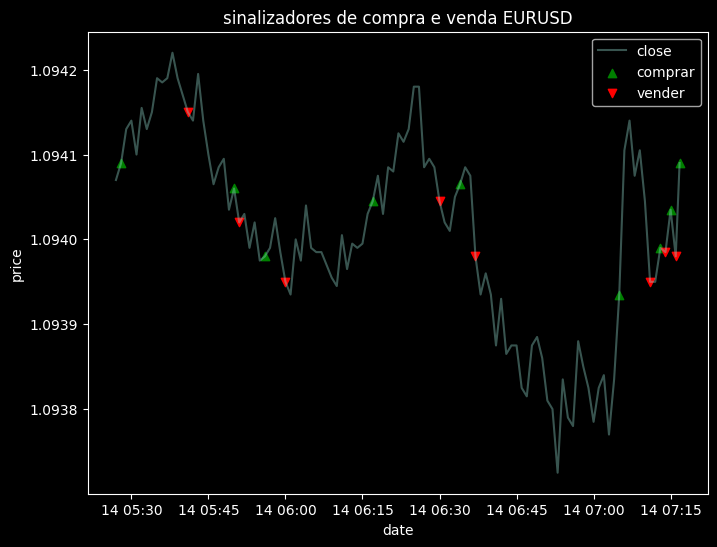

In [103]:
plt.figure(figsize=(8, 6))
plt.plot(df.close, label='close', alpha=0.4)
plt.scatter(df.index, df.sinalizador_comprar, label='comprar', marker='^', color='green')
plt.scatter(df.index, df.sinalizador_vender, label='vender', marker='v', color='red')
plt.title(f'sinalizadores de compra e venda {goal}')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()